<a href="https://colab.research.google.com/github/salitadmonte/Linking/blob/master/boat_flipkart_vadder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import pandas as pd
# Import Libraries/ packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set()
import re
import string
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 

In [8]:
from google.colab import files
uploaded = files.upload()


Saving boat_flipkart.csv to boat_flipkart.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['boat_flipkart.csv']))

In [10]:
# Read in data
#df = pd.read_csv('//content/boat_flipkart.csv')
#df
print(df.shape)
# df = df.head(500)
# print(df.shape)

(12721, 10)


In [11]:
df

,Unnamed: 0,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,1. Material Quality - Not Bad...2. Sound Quali...,Golaghat District,"Oct, 2021",3575,726
1,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Terrific,Battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115
2,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,Nice product and fast delivery . I am happy n...,Puruliya,"May, 2021",2148,536
3,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Good quality product,Delivered in 20 February.. today is 28 Februar...,Ranchi,"Feb, 2021",4025,1039
4,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Must buy!,Writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376
...,...,...,...,...,...,...,...,...,...,...
12716,12716,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Simply awesome,Good,Kalyandurg,2 months ago,0,0
12717,12717,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Terrific purchase,Awesome product in this price range,North Twenty Four Parganas District,3 months ago,0,0
12718,12718,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",4,Very Good,Awesome,Sambalpur,3 months ago,0,0
12719,12719,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Mind-blowing purchase,Good,Shahjahanpur,2 months ago,0,0


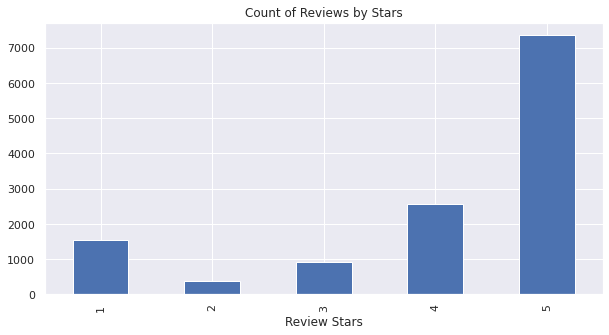

In [12]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [13]:
def labels(x):
    
    if x == 1:
        return 'Extremely Negative'
    elif x == 2:
        return 'Negative'
    elif x == 3:
        return 'Neutral'
    elif x==4:
      return 'Positive'
    else:
     return 'Extremely Positive'  

In [15]:
df['ratings_sentiment']=df['rating'].apply(lambda X: labels(X))
df

,Unnamed: 0,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,ratings_sentiment
0,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,1. Material Quality - Not Bad...2. Sound Quali...,Golaghat District,"Oct, 2021",3575,726,Extremely Positive
1,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Terrific,Battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115,Extremely Positive
2,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,Nice product and fast delivery . I am happy n...,Puruliya,"May, 2021",2148,536,Extremely Positive
3,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Good quality product,Delivered in 20 February.. today is 28 Februar...,Ranchi,"Feb, 2021",4025,1039,Positive
4,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Must buy!,Writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376,Extremely Positive
...,...,...,...,...,...,...,...,...,...,...,...
12716,12716,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Simply awesome,Good,Kalyandurg,2 months ago,0,0,Extremely Positive
12717,12717,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Terrific purchase,Awesome product in this price range,North Twenty Four Parganas District,3 months ago,0,0,Extremely Positive
12718,12718,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",4,Very Good,Awesome,Sambalpur,3 months ago,0,0,Positive
12719,12719,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Mind-blowing purchase,Good,Shahjahanpur,2 months ago,0,0,Extremely Positive


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12721 entries, 0 to 12720
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         12721 non-null  int64 
 1   product_id         12721 non-null  object
 2   product_title      12721 non-null  object
 3   rating             12721 non-null  int64 
 4   summary            12721 non-null  object
 5   review             12715 non-null  object
 6   location           12231 non-null  object
 7   date               12721 non-null  object
 8   upvotes            12721 non-null  int64 
 9   downvotes          12721 non-null  int64 
 10  ratings_sentiment  12721 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [17]:
df['review']=df['review'].astype(str)
type(df['review'])

pandas.core.series.Series

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12721 entries, 0 to 12720
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         12721 non-null  int64 
 1   product_id         12721 non-null  object
 2   product_title      12721 non-null  object
 3   rating             12721 non-null  int64 
 4   summary            12721 non-null  object
 5   review             12721 non-null  object
 6   location           12231 non-null  object
 7   date               12721 non-null  object
 8   upvotes            12721 non-null  int64 
 9   downvotes          12721 non-null  int64 
 10  ratings_sentiment  12721 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [19]:
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Calling set of SpaCy stopwords
spacy.cli.download("en_core_web_sm")
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
# Calling the list of nltk stopwords
en_stopwords = stopwords.words('english')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
#cleaning reviews
import string
df['review']=df['review'].str.lower()
df.review

0        1. material quality - not bad...2. sound quali...
1        battery backup is best and full charge very qu...
2        nice product and fast delivery .  i am happy n...
3        delivered in 20 february.. today is 28 februar...
4        writing this review after using more than 15 d...
                               ...                        
12716                                                 good
12717                  awesome product in this price range
12718                                              awesome
12719                                                 good
12720                                        super product
Name: review, Length: 12721, dtype: object

In [22]:
df.describe()

,Unnamed: 0,rating,upvotes,downvotes
count,12721.000000,12721.000000,12721.000000,12721.000000
mean,6360.000000,4.084820,46.154233,11.970993
std,3672.380722,1.359091,362.417012,82.769850
min,0.000000,1.000000,0.000000,0.000000
25%,3180.000000,4.000000,0.000000,0.000000
50%,6360.000000,5.000000,1.000000,0.000000
75%,9540.000000,5.000000,5.000000,1.000000
max,12720.000000,5.000000,15061.000000,3108.000000


In [23]:
df.duplicated().sum()

0

In [24]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.8 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=e26b55e8e248ad2190d42843833ba2e8e161d8888043e51a2417372e0837f60d
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [25]:
def remove_emoji(text):
    import emoji
    import re 


    text =  emoji.demojize(text)
    text = re.sub(r'(:[!_\-\w]+:)', '', text)

    return text

In [26]:
def remove_whitespace(text):
    return  " ".join(text.split())

import re
#remove url
def remove_URL(text):
    url=re.compile(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)")
    return url.sub(r"",text)

#remove html
def remove_html(text):
    html=re.compile(r"<.*?>")
    return html.sub(r"",text)

#remove usernme
def remove_username(text):
    username=re.compile(r"@[^\s]+")
    return username.sub(r"",text)


def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

In [27]:
df['review_c']= df['review'].apply(lambda x:remove_emoji(x))

In [28]:
df['review_c']= df['review_c'].apply(lambda x:remove_whitespace(x))
df['review_c']= df['review_c'].apply(lambda x:remove_URL(x))
df['review_c']= df['review_c'].apply(lambda x:remove_html(x))
df['review_c']= df['review_c'].apply(lambda x:remove_username(x))
df['review_c']= df['review_c'].apply(lambda x:clean_hashtags(x))
df['review_c'].head(30)

0     1. material quality - not bad...2. sound quali...
1     battery backup is best and full charge very qu...
2     nice product and fast delivery . i am happy ni...
3     delivered in 20 february.. today is 28 februar...
4     writing this review after using more than 15 d...
5     one of the best bluetooth boat. 1- battery bac...
6     this product is acctullly best. best coloty an...
7     great product., battery backup up to 14 days u...
8     the product was too worthy for buying. super q...
9     i got this product on 5th oct 2021 , today is ...
10    just got my hands on this product. let me be h...
11    bass is good 4/5battery life is awesome 5/5bui...
12    base is not good but volume is so loud treble ...
13    rockerz 255pro+ is excellent and value for mon...
14    this neckband looks good for its price especia...
15    the battery life is really amazing, on average...
16    its only 7 months i bought this product. it wa...
17    as compared to any other company models an

In [29]:
import re
def remove_non_ascii(text):

    return re.sub(r'[^\x00-\x7F]',r'', text,count=0,flags=re.IGNORECASE)

In [30]:
df['review_c']= df['review_c'].apply(lambda x:remove_non_ascii(x))
df['review_c'].head(30)

0     1. material quality - not bad...2. sound quali...
1     battery backup is best and full charge very qu...
2     nice product and fast delivery . i am happy ni...
3     delivered in 20 february.. today is 28 februar...
4     writing this review after using more than 15 d...
5     one of the best bluetooth boat. 1- battery bac...
6     this product is acctullly best. best coloty an...
7     great product., battery backup up to 14 days u...
8     the product was too worthy for buying. super q...
9     i got this product on 5th oct 2021 , today is ...
10    just got my hands on this product. let me be h...
11    bass is good 4/5battery life is awesome 5/5bui...
12    base is not good but volume is so loud treble ...
13    rockerz 255pro+ is excellent and value for mon...
14    this neckband looks good for its price especia...
15    the battery life is really amazing, on average...
16    its only 7 months i bought this product. it wa...
17    as compared to any other company models an

In [ ]:
# def remove_digits(text):
#   new_text=''+"".join(x for x in text if x.isalpha())
#   new_text2 = "  ".join(word.strip() for word in re.split('#|_', new_text))
#   return new_text2

In [31]:
def remove_digit(text):
  new_text= ''.join(c if c not in map(str,range(0,10)) else "" for c in text)
  return new_text

In [32]:
string = "akshat123garg"
s1= remove_digit(string)
print(s1)  

akshatgarg


In [33]:
stringWithNumbers="I have 10 bananas for my 5 monkeys!"
stringWithoutNumbers=''.join(c if c not in map(str,range(0,10)) else "" for c in stringWithNumbers)
print(stringWithoutNumbers) #I have  bananas for my  monkeys!

I have  bananas for my  monkeys!


In [34]:
df['review_c']= df['review_c'].apply(lambda x:remove_digit(x))
df['review_c'].head(30)

0     . material quality - not bad.... sound quality...
1     battery backup is best and full charge very qu...
2     nice product and fast delivery . i am happy ni...
3     delivered in  february.. today is  february an...
4     writing this review after using more than  day...
5     one of the best bluetooth boat. - battery back...
6     this product is acctullly best. best coloty an...
7     great product., battery backup up to  days use...
8     the product was too worthy for buying. super q...
9     i got this product on th oct  , today is th oc...
10    just got my hands on this product. let me be h...
11    bass is good /battery life is awesome /built q...
12    base is not good but volume is so loud treble ...
13    rockerz pro+ is excellent and value for money ...
14    this neckband looks good for its price especia...
15    the battery life is really amazing, on average...
16    its only  months i bought this product. it was...
17    as compared to any other company models an

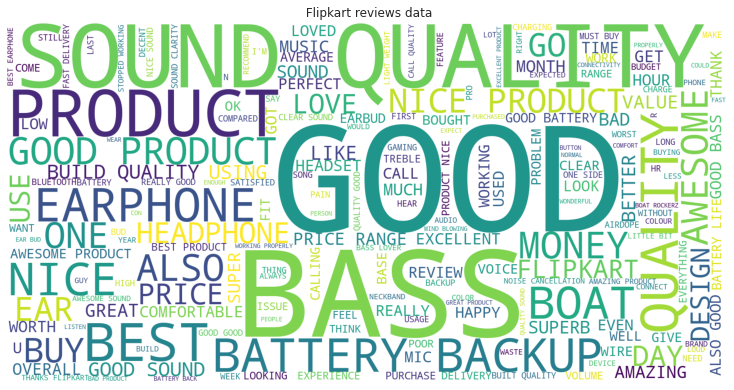

In [35]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
def cloud(text):
    wordcloud = WordCloud(background_color="White",stopwords=stop,width=1600, height=800).generate(" ".join([i for i in text.str.upper()]))
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(" Flipkart reviews data")
    
cloud(df['review_c'])

In [36]:
import spacy
# Calling set of SpaCy stopwords
spacy.cli.download("en_core_web_sm")
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
# Calling the list of nltk stopwords
en_stopwords = stopwords.words('english')
# Converting list to set
set(en_stopwords)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [37]:
# Joining SpaCy and NLTK sets of Stopwords
comb_stopwords = list(sw_spacy.union(en_stopwords))

In [38]:
nltk.download('punkt')
# Define function to remove stopwords
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in comb_stopwords:
            result.append(token)     
    return result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
df['review_Tokenized']=df['review_c'].apply(lambda X: word_tokenize(X))
df['review_Tokenized']

0        [., material, quality, -, not, bad, ...., soun...
1        [battery, backup, is, best, and, full, charge,...
2        [nice, product, and, fast, delivery, ., i, am,...
3        [delivered, in, february, .., today, is, febru...
4        [writing, this, review, after, using, more, th...
                               ...                        
12716                                               [good]
12717           [awesome, product, in, this, price, range]
12718                                            [awesome]
12719                                               [good]
12720                                     [super, product]
Name: review_Tokenized, Length: 12721, dtype: object

In [40]:
df['review_sw']=df['review_Tokenized'].apply(lambda X: remove_stopwords(X))
df['review_sw']

0        [., material, quality, -, bad, ...., sound, qu...
1        [battery, backup, best, charge, quickly, ., so...
2        [nice, product, fast, delivery, ., happy, nice...
3        [delivered, february, .., today, february, cha...
4        [writing, review, days, ., f, pro+, super, sou...
                               ...                        
12716                                               [good]
12717                     [awesome, product, price, range]
12718                                            [awesome]
12719                                               [good]
12720                                     [super, product]
Name: review_sw, Length: 12721, dtype: object

In [45]:
import string
#defining function to remove punctuations
def remove_punctuation(text):
    punctuationfree=" ".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [46]:
df['review_sw']=df['review_sw'].apply(lambda X: remove_punctuation(X))
df['review_sw']

0        material quality bad .... sound quality awesom...
1        battery backup best charge quickly sound quali...
2        nice product fast delivery happy nice job flip...
3        delivered february .. today february charge ti...
4        writing review days f pro+ super sound quality...
                               ...                        
12716                                                 good
12717                          awesome product price range
12718                                              awesome
12719                                                 good
12720                                        super product
Name: review_sw, Length: 12721, dtype: object

In [47]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [48]:
def lemma_word(text):
    tokenized = nltk.word_tokenize(text)
    lemmatizer=WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(words) for words in tokenized])

In [49]:
df['review_lm']= df['review_sw'].apply(lambda x:lemma_word(x))
df['review_lm']

0        material quality bad .... sound quality awesom...
1        battery backup best charge quickly sound quali...
2        nice product fast delivery happy nice job flip...
3        delivered february .. today february charge ti...
4        writing review day f pro+ super sound quality ...
                               ...                        
12716                                                 good
12717                          awesome product price range
12718                                              awesome
12719                                                 good
12720                                        super product
Name: review_lm, Length: 12721, dtype: object

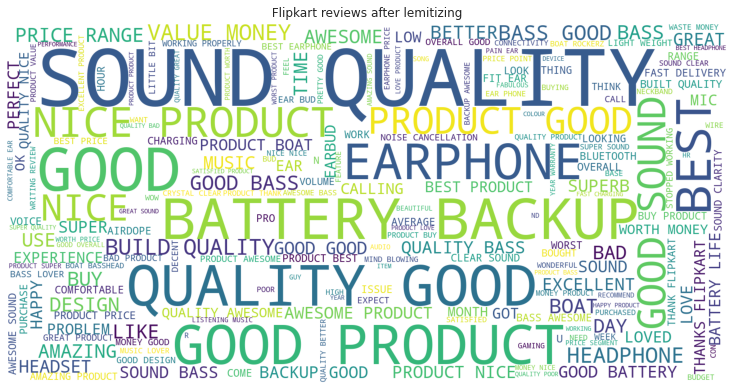

In [50]:
def cloud(text):
    wordcloud = WordCloud(background_color="White",stopwords=stop,width=1600, height=800).generate(" ".join([i for i in text.str.upper()]))
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(" Flipkart reviews after lemitizing ")
    
cloud(df['review_lm'])

In [69]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [75]:
# sia.polarity_scores(example)
df['polarity_scores']= df['review_lm'].apply(lambda x:sia.polarity_scores(x))

In [76]:
df['polarity_scores']

0        {'neg': 0.072, 'neu': 0.58, 'pos': 0.348, 'com...
1        {'neg': 0.093, 'neu': 0.352, 'pos': 0.555, 'co...
2        {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...
3        {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
4        {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou...
                               ...                        
12716    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12717    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
12718    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12719    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12720    {'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'comp...
Name: polarity_scores, Length: 12721, dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12721 entries, 0 to 12720
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SR_ID              12721 non-null  int64  
 1   Unnamed: 0         12721 non-null  int64  
 2   product_id         12721 non-null  object 
 3   product_title      12721 non-null  object 
 4   rating             12721 non-null  int64  
 5   summary            12721 non-null  object 
 6   review             12721 non-null  object 
 7   location           12231 non-null  object 
 8   date               12721 non-null  object 
 9   upvotes            12721 non-null  int64  
 10  downvotes          12721 non-null  int64  
 11  ratings_sentiment  12721 non-null  object 
 12  review_c           12721 non-null  object 
 13  review_Tokenized   12721 non-null  object 
 14  review_sw          12721 non-null  object 
 15  review_lm          12721 non-null  object 
 16  polarity_textblob  127

In [66]:
#d=pd.DataFrame(polarity_scores)
#d.columns =['polarity_score']

In [67]:
#d_s=d["polarity_score"].apply(pd.Series)

In [56]:
#d_s['compound']

0        0.9231
1        0.9100
2        0.9042
3        0.8779
4        0.9423
          ...  
12716    0.4404
12717    0.6249
12718    0.6249
12719    0.4404
12720    0.5994
Name: compound, Length: 12721, dtype: float64

In [57]:
#d_s['neg']

0        0.072
1        0.093
2        0.000
3        0.000
4        0.000
         ...  
12716    0.000
12717    0.000
12718    0.000
12719    0.000
12720    0.000
Name: neg, Length: 12721, dtype: float64

In [58]:
#d_s = d_s.reset_index().rename(columns={'index': 'SR_ID'})
#d_s

,SR_ID,neg,neu,pos,compound
0,0,0.072,0.580,0.348,0.9231
1,1,0.093,0.352,0.555,0.9100
2,2,0.000,0.291,0.709,0.9042
3,3,0.000,0.832,0.168,0.8779
4,4,0.000,0.470,0.530,0.9423
...,...,...,...,...,...
12716,12716,0.000,0.000,1.000,0.4404
12717,12717,0.000,0.423,0.577,0.6249
12718,12718,0.000,0.000,1.000,0.6249
12719,12719,0.000,0.000,1.000,0.4404


In [59]:
#df = df.reset_index().rename(columns={'index': 'SR_ID'})
#df.head(20)

,SR_ID,Unnamed: 0,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,ratings_sentiment,review_c,review_Tokenized,review_sw,review_lm
0,0,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,1. material quality - not bad...2. sound quali...,Golaghat District,"Oct, 2021",3575,726,Extremely Positive,. material quality - not bad.... sound quality...,"[., material, quality, -, not, bad, ...., soun...",material quality bad .... sound quality awesom...,material quality bad .... sound quality awesom...
1,1,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Terrific,battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115,Extremely Positive,battery backup is best and full charge very qu...,"[battery, backup, is, best, and, full, charge,...",battery backup best charge quickly sound quali...,battery backup best charge quickly sound quali...
2,2,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,nice product and fast delivery . i am happy n...,Puruliya,"May, 2021",2148,536,Extremely Positive,nice product and fast delivery . i am happy ni...,"[nice, product, and, fast, delivery, ., i, am,...",nice product fast delivery happy nice job flip...,nice product fast delivery happy nice job flip...
3,3,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Good quality product,delivered in 20 february.. today is 28 februar...,Ranchi,"Feb, 2021",4025,1039,Positive,delivered in february.. today is february an...,"[delivered, in, february, .., today, is, febru...",delivered february .. today february charge ti...,delivered february .. today february charge ti...
4,4,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Must buy!,writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376,Extremely Positive,writing this review after using more than day...,"[writing, this, review, after, using, more, th...",writing review days f pro+ super sound quality...,writing review day f pro+ super sound quality ...
5,5,5,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Great product,one of the best bluetooth boat. 1- battery bac...,New Town,"Mar, 2021",2276,581,Extremely Positive,one of the best bluetooth boat. - battery back...,"[one, of, the, best, bluetooth, boat, ., -, ba...",best bluetooth boat battery backup amazing lig...,best bluetooth boat battery backup amazing lig...
6,6,6,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Wonderful,this product is acctullly best. best coloty an...,Morbi,"Feb, 2021",1005,256,Positive,this product is acctullly best. best coloty an...,"[this, product, is, acctullly, best, ., best, ...",product acctullly best best coloty design.but ...,product acctullly best best coloty design.but ...
7,7,7,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Perfect product!,"great product., battery backup up to 14 days u...",Guntur,"Feb, 2021",503,123,Extremely Positive,"great product., battery backup up to days use...","[great, product., ,, battery, backup, up, to, ...",great product. battery backup days use sound q...,great product . battery backup day use sound q...
8,8,8,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Perfect product!,the product was too worthy for buying. super q...,Bhubaneswar,4 months ago,407,101,Extremely Positive,the product was too worthy for buying. super q...,"[the, product, was, too, worthy, for, buying, ...",product worthy buying super quality delivery b...,product worthy buying super quality delivery b...
9,9,9,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Worth the money,"i got this product on 5th oct 2021 , today is ...",Kodur,"Oct, 2021",391,104,Positive,"i got this product on th oct , today is th oc...","[i, got, this, product, on, th, oct, ,, today,...",got product th oct today th october .iam produ...,got product th oct today

In [60]:
#vaders = d_s.merge(df, how='left')

In [61]:
#vaders

,SR_ID,neg,neu,pos,compound,Unnamed: 0,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,ratings_sentiment,review_c,review_Tokenized,review_sw,review_lm
0,0,0.072,0.580,0.348,0.9231,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,1. material quality - not bad...2. sound quali...,Golaghat District,"Oct, 2021",3575,726,Extremely Positive,. material quality - not bad.... sound quality...,"[., material, quality, -, not, bad, ...., soun...",material quality bad .... sound quality awesom...,material quality bad .... sound quality awesom...
1,1,0.093,0.352,0.555,0.9100,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Terrific,battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115,Extremely Positive,battery backup is best and full charge very qu...,"[battery, backup, is, best, and, full, charge,...",battery backup best charge quickly sound quali...,battery backup best charge quickly sound quali...
2,2,0.000,0.291,0.709,0.9042,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,nice product and fast delivery . i am happy n...,Puruliya,"May, 2021",2148,536,Extremely Positive,nice product and fast delivery . i am happy ni...,"[nice, product, and, fast, delivery, ., i, am,...",nice product fast delivery happy nice job flip...,nice product fast delivery happy nice job flip...
3,3,0.000,0.832,0.168,0.8779,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Good quality product,delivered in 20 february.. today is 28 februar...,Ranchi,"Feb, 2021",4025,1039,Positive,delivered in february.. today is february an...,"[delivered, in, february, .., today, is, febru...",delivered february .. today february charge ti...,delivered february .. today february charge ti...
4,4,0.000,0.470,0.530,0.9423,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Must buy!,writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376,Extremely Positive,writing this review after using more than day...,"[writing, this, review, after, using, more, th...",writing review days f pro+ super sound quality...,writing review day f pro+ super sound quality ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12716,12716,0.000,0.000,1.000,0.4404,12716,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Simply awesome,good,Kalyandurg,2 months ago,0,0,Extremely Positive,good,[good],good,good
12717,12717,0.000,0.423,0.577,0.6249,12717,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Terrific purchase,awesome product in this price range,North Twenty Four Parganas District,3 months ago,0,0,Extremely Positive,awesome product in this price range,"[awesome, product, in, this, price, range]",awesome product price range,awesome product price range
12718,12718,0.000,0.000,1.000,0.6249,12718,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",4,Very Good,awesome,Sambalpur,3 months ago,0,0,Positive,awesome,[awesome],awesome,awesome
12719,12719,0.000,0.000,1.000,0.4404,12719,ACCGD52TTWUJZX4M,"boAt Rockerz 260 with Beast Mode, ENx Tech and...",5,Mind-blowing purchase,good,Shahjahanpur,2 months ago,0,0,Extremely Positive,good,[good],good,good


In [ ]:
#vaders.to_csv("boat_flipkart_vadder.csv")

In [ ]:
#data=pd.read_csv("/content/boat_flipkart_vadder.csv")
#data.head(30)

,Unnamed: 0,SR_ID,neg,neu,pos,compound,Unnamed: 0.1,product_id,product_title,rating,...,review,location,date,upvotes,downvotes,ratings_sentiment,review_c,review_Tokenized,review_sw,review_lm
0,0,0,0.072,0.580,0.348,0.9231,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,1. material quality - not bad...2. sound quali...,Golaghat District,"Oct, 2021",3575,726,Extremely Positive,. material quality - not bad.... sound quality...,"['.', 'material', 'quality', '-', 'not', 'bad'...",material quality bad .... sound quality awesom...,material quality bad .... sound quality awesom...
1,1,1,0.093,0.352,0.555,0.9100,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115,Extremely Positive,battery backup is best and full charge very qu...,"['battery', 'backup', 'is', 'best', 'and', 'fu...",battery backup best charge quickly sound quali...,battery backup best charge quickly sound quali...
2,2,2,0.000,0.291,0.709,0.9042,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,nice product and fast delivery . i am happy n...,Puruliya,"May, 2021",2148,536,Extremely Positive,nice product and fast delivery . i am happy ni...,"['nice', 'product', 'and', 'fast', 'delivery',...",nice product fast delivery happy nice job flip...,nice product fast delivery happy nice job flip...
3,3,3,0.000,0.832,0.168,0.8779,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,...,delivered in 20 february.. today is 28 februar...,Ranchi,"Feb, 2021",4025,1039,Positive,delivered in february.. today is february an...,"['delivered', 'in', 'february', '..', 'today',...",delivered february .. today february charge ti...,delivered february .. today february charge ti...
4,4,4,0.000,0.470,0.530,0.9423,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376,Extremely Positive,writing this review after using more than day...,"['writing', 'this', 'review', 'after', 'using'...",writing review days f pro+ super sound quality...,writing review day f pro+ super sound quality ...
5,5,5,0.000,0.312,0.688,0.9723,5,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,one of the best bluetooth boat. 1- battery bac...,New Town,"Mar, 2021",2276,581,Extremely Positive,one of the best bluetooth boat. - battery back...,"['one', 'of', 'the', 'best', 'bluetooth', 'boa...",best bluetooth boat battery backup amazing lig...,best bluetooth boat battery backup amazing lig...
6,6,6,0.089,0.392,0.519,0.9615,6,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,...,this product is acctullly best. best coloty an...,Morbi,"Feb, 2021",1005,256,Positive,this product is acctullly best. best coloty an...,"['this', 'product', 'is', 'acctullly', 'best',...",product acctullly best best coloty design.but ...,product acctullly best best coloty design.but ...
7,7,7,0.000,0.402,0.598,0.9169,7,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,"great product., battery backup up to 14 days u...",Guntur,"Feb, 2021",503,123,Extremely Positive,"great product., battery backup up to days use...","['great', 'product.', ',', 'battery', 'backup'...",great product. battery backup days use sound q...,great product . battery backup day use sound q...
8,8,8,0.000,0.442,0.558,0.9633,8,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,...,the product was too worthy for buying. super q...,Bhubaneswar,4 months ago,407,101,Extremely Positive,the product was too worthy for buying. super q...,"['the', 'product', 'was', 'too', 'worthy', 'fo...",product worthy buying super quality delivery b...,product worthy buying super quality delivery b...
9,9,9,0.021,0.675,0.304,0.9521,9,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,...,"i got this product on 5th oct 2021 , today is ...",Kodur,

In [78]:
from textblob import TextBlob, Word, Blobber
df['polarity_textblob'] = df['review_c'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['review_c'].astype(str).apply(len)
df['word_count'] = df['review_c'].apply(lambda x: len(str(x).split()))
df.head()

,SR_ID,Unnamed: 0,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,ratings_sentiment,review_c,review_Tokenized,review_sw,review_lm,polarity_textblob,review_len,word_count,polarity_scores
0,0,0,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,1. material quality - not bad...2. sound quali...,Golaghat District,"Oct, 2021",3575,726,Extremely Positive,. material quality - not bad.... sound quality...,"[., material, quality, -, not, bad, ...., soun...",material quality bad .... sound quality awesom...,material quality bad .... sound quality awesom...,0.523667,254,41,"{'neg': 0.072, 'neu': 0.58, 'pos': 0.348, 'com..."
1,1,1,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Terrific,battery backup is best and full charge very qu...,New Delhi,"Aug, 2021",568,115,Extremely Positive,battery backup is best and full charge very qu...,"[battery, backup, is, best, and, full, charge,...",battery backup best charge quickly sound quali...,battery backup best charge quickly sound quali...,0.650000,125,23,"{'neg': 0.093, 'neu': 0.352, 'pos': 0.555, 'co..."
2,2,2,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Just wow!,nice product and fast delivery . i am happy n...,Puruliya,"May, 2021",2148,536,Extremely Positive,nice product and fast delivery . i am happy ni...,"[nice, product, and, fast, delivery, ., i, am,...",nice product fast delivery happy nice job flip...,nice product fast delivery happy nice job flip...,0.480000,68,13,"{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp..."
3,3,3,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,4,Good quality product,delivered in 20 february.. today is 28 februar...,Ranchi,"Feb, 2021",4025,1039,Positive,delivered in february.. today is february an...,"[delivered, in, february, .., today, is, febru...",delivered february .. today february charge ti...,delivered february .. today february charge ti...,0.178671,487,85,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
4,4,4,ACCFZ95MY8SGZQRT,boAt Rockerz 255 Pro+ with ASAP Charge and upt...,5,Must buy!,writing this review after using more than 15 d...,Jhabua,"Mar, 2021",1505,376,Extremely Positive,writing this review after using more than day...,"[writing, this, review, after, using, more, th...",writing review days f pro+ super sound quality...,writing review day f pro+ super sound quality ...,0.294231,286,48,"{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou..."


In [79]:
df[['polarity_textblob','polarity_scores']]

,polarity_textblob,polarity_scores
0,0.523667,"{'neg': 0.072, 'neu': 0.58, 'pos': 0.348, 'com..."
1,0.650000,"{'neg': 0.093, 'neu': 0.352, 'pos': 0.555, 'co..."
2,0.480000,"{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp..."
3,0.178671,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
4,0.294231,"{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou..."
...,...,...
12716,0.700000,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
12717,1.000000,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
12718,1.000000,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
12719,0.700000,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [64]:
polarity_scores

0        {'neg': 0.072, 'neu': 0.58, 'pos': 0.348, 'com...
1        {'neg': 0.093, 'neu': 0.352, 'pos': 0.555, 'co...
2        {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...
3        {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
4        {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou...
                               ...                        
12716    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12717    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
12718    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12719    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
12720    {'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'comp...
Name: review_lm, Length: 12721, dtype: object

In [81]:
df.to_csv("Flipkart_B.csv")

In [83]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 21.7 MB/s 
     |████████████████████████████████| 163 kB 75.9 MB/s 
     |████████████████████████████████| 7.6 MB 58.4 MB/s 


In [84]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [85]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]